# 초기 당뇨병 위험을 예측하기 위한 데이터 연관분석

## 연관규칙분석이란?

- 연관 규칙 분석이란 어떤 두 아이템 집합이 번번히 발생하는가를 알려주는 일련의 규칙들을 생성하는 알고리즘입니다.

연관규칙분석, 장바구니분석 (Association Rule Analysis, Market Basket Analysis) : 고객의 대규모 거래데이터로부터 함께 구매가 발생하는 규칙(예: A à 동시에 B)을 도출하여, 고객이 특정 상품 구매 시 이와 연관성 높은 상품을 추천

### 좋은 규칙을 판단하는 세가지 지표

- 지지도(support) : 한 거래 항목 안에 A와 B를 동시에 포함하는 거래의 비율. 지지도는 A와 B가 함께 등장할 확률입니다. 전체 거래의 수를 A와 B가 동시에 포함된 거래수를 나눠주면 구할 수 있습니다.
- 신뢰도(confidence) : 항목 A가 포함하는 거래에 A와 B가 같이포함될 확률. 신뢰도는 조건부 확률과 유사합니다. A가 일어났을 때 B의 확률입니다. A의 확률을 A와 B가 동시에 포함될 확률을 나눠주면 구할 수 있습니다.
- 향상도(lift) : A가 주어지지 않을 때의 품목 B의 확률에 비해 A가 주어졌을 때 품목 B의 증가 비율. B의 확률이 A가 일어났을 때 B의 확률을 나눴을 때 구할 수 있습니다. lift 값은 1이면 서로 독립적인 관계이며1보다 크면 두 품목이 서로 양의 상관관계, 1보다 작으면 두 품목이 서로 음의 상관관계입니다. A와 B가 독립이면 분모, 분자가 같기 때문에 1이 나옵니다.

In [1]:
# 데이터 분석에 필요한 모듈 불러오기(연관분석(장바구니분석) 하기위한 Apriori 알고리즘 임포트)

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [2]:
# 데이터프레임 가져오기

dataset = pd.read_csv("https://docs.google.com/uc?export=download&id=1rGlt2G1Ya3Z1QMYv2qH16EOb36XtJQo6")
df = pd.DataFrame(dataset)
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
df.dtypes # 데이터프레임 타입

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [6]:
# 데이터프레임 타입 변환

df = df.replace({'Polyuria': {'Yes': True,  
                                'No': False}})
df = df.replace({'Polydipsia': {'Yes': True,  
                                'No': False}})
df = df.replace({'sudden weight loss': {'Yes': True,  
                                'No': False}})
df = df.replace({'weakness': {'Yes': True,  
                                'No': False}})
df = df.replace({'Polyphagia': {'Yes': True,  
                                'No': False}})
df = df.replace({'Genital thrush': {'Yes': True,  
                                'No': False}})
df = df.replace({'visual blurring': {'Yes': True,  
                                'No': False}})
df = df.replace({'Itching': {'Yes': True,  
                                'No': False}})
df = df.replace({'Irritability': {'Yes': True,  
                                'No': False}})
df = df.replace({'delayed healing': {'Yes': True,  
                                'No': False}})
df = df.replace({'partial paresis': {'Yes': True,  
                                'No': False}})
df = df.replace({'muscle stiffness': {'Yes': True,  
                                'No': False}})
df = df.replace({'Alopecia': {'Yes': True,  
                                'No': False}})
df = df.replace({'Obesity': {'Yes': True,  
                                'No': False}})

In [7]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,False,True,False,True,False,False,False,True,False,True,False,True,True,True,Positive
1,58,Male,False,False,False,True,False,False,True,False,False,False,True,False,True,False,Positive
2,41,Male,True,False,False,True,True,False,False,True,False,True,False,True,True,False,Positive
3,45,Male,False,False,True,True,True,True,False,True,False,True,False,False,False,False,Positive
4,60,Male,True,True,True,True,True,False,True,True,True,True,True,True,True,True,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,True,True,True,False,True,False,False,True,False,True,True,False,False,False,Positive
516,48,Female,True,True,True,True,True,False,False,True,True,True,True,False,False,False,Positive
517,58,Female,True,True,True,True,True,False,True,False,False,False,True,True,False,True,Positive
518,32,Female,False,False,False,True,False,False,True,True,False,True,False,False,True,False,Negative


In [8]:
df.dtypes

Age                    int64
Gender                object
Polyuria                bool
Polydipsia              bool
sudden weight loss      bool
weakness                bool
Polyphagia              bool
Genital thrush          bool
visual blurring         bool
Itching                 bool
Irritability            bool
delayed healing         bool
partial paresis         bool
muscle stiffness        bool
Alopecia                bool
Obesity                 bool
class                 object
dtype: object

In [9]:
df1 = pd.DataFrame(df) # 연관분석을 위한 데이터프레임 모두 Bool타입 변환

In [10]:
df1 = df1.replace({'Gender': {'Male': True,  
                                'Female': False}})
df1 = df1.replace({'class': {'Positive': True,  
                                'Negative': False}})
def test(x):
    if x > 35:
        return True
    else:
        return False
df1['Age'] = df1['Age'].apply(test)

In [11]:
df1

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,True,True,False,True,False,True,False,False,False,True,False,True,False,True,True,True,True
1,True,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True
2,True,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False,True
3,True,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False,True
4,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,True,False,True,True,True,False,True,False,False,True,False,True,True,False,False,False,True
516,True,False,True,True,True,True,True,False,False,True,True,True,True,False,False,False,True
517,True,False,True,True,True,True,True,False,True,False,False,False,True,True,False,True,True
518,False,False,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False


In [12]:
df1.dtypes # 연관분석을 위한 데이터프레임 변환완료

Age                   bool
Gender                bool
Polyuria              bool
Polydipsia            bool
sudden weight loss    bool
weakness              bool
Polyphagia            bool
Genital thrush        bool
visual blurring       bool
Itching               bool
Irritability          bool
delayed healing       bool
partial paresis       bool
muscle stiffness      bool
Alopecia              bool
Obesity               bool
class                 bool
dtype: object

In [13]:
# 지지도 분석

frequent_itemsets = apriori(df1, min_support=0.4, use_colnames=True)
frequent_itemsets.sort_values(by=['support'],ascending=False)

,support,itemsets
0,0.821154,(Age)
1,0.630769,(Gender)
11,0.615385,(class)
5,0.586538,(weakness)
12,0.532692,"(Age, Gender)"
14,0.523077,"(Age, weakness)"
19,0.517308,"(Age, class)"
2,0.496154,(Polyuria)
8,0.486538,(Itching)
20,0.467308,"(class, Polyuria)"


In [14]:
# 신뢰도 분석

from mlxtend.frequent_patterns import association_rules
association_rules1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
association_rules1.sort_values(by=['confidence'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(Polydipsia),(class),0.448077,0.615385,0.432692,0.965665,1.569206,0.156953,11.201923
16,(Polyuria),(class),0.496154,0.615385,0.467308,0.941860,1.530523,0.161982,6.615385
22,"(Age, Polyuria)",(class),0.432692,0.615385,0.403846,0.933333,1.516667,0.137574,5.769231
10,(Itching),(Age),0.486538,0.821154,0.453846,0.932806,1.135970,0.054323,2.661652
12,(delayed healing),(Age),0.459615,0.821154,0.421154,0.916318,1.115891,0.043739,2.137212
8,(visual blurring),(Age),0.448077,0.821154,0.409615,0.914163,1.113267,0.041675,2.083558
7,(Polyphagia),(Age),0.455769,0.821154,0.413462,0.907173,1.104754,0.039205,1.926661
5,(weakness),(Age),0.586538,0.821154,0.523077,0.891803,1.086037,0.041439,1.652972
3,(Polyuria),(Age),0.496154,0.821154,0.432692,0.872093,1.062034,0.025274,1.398252
23,"(class, Polyuria)",(Age),0.467308,0.821154,0.403846,0.864198,1.052419,0.020115,1.316958


In [15]:
# 향상도 분석

association_rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
association_rules2.sort_values(by=['lift'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(Polyuria),"(Age, class)",0.496154,0.517308,0.403846,0.813953,1.573442,0.147182,2.594471
22,"(Age, class)",(Polyuria),0.517308,0.496154,0.403846,0.780669,1.573442,0.147182,2.297197
18,(class),(Polydipsia),0.615385,0.448077,0.432692,0.703125,1.569206,0.156953,1.859109
19,(Polydipsia),(class),0.448077,0.615385,0.432692,0.965665,1.569206,0.156953,11.201923
17,(Polyuria),(class),0.496154,0.615385,0.467308,0.941860,1.530523,0.161982,6.615385
16,(class),(Polyuria),0.615385,0.496154,0.467308,0.759375,1.530523,0.161982,2.093906
26,(class),"(Age, Polyuria)",0.615385,0.432692,0.403846,0.656250,1.516667,0.137574,1.650350
23,"(Age, Polyuria)",(class),0.432692,0.615385,0.403846,0.933333,1.516667,0.137574,5.769231
20,(class),(weakness),0.615385,0.586538,0.419231,0.681250,1.161475,0.058284,1.297134
21,(weakness),(class),0.586538,0.615385,0.419231,0.714754,1.161475,0.058284,1.348364


<AxesSubplot:xlabel='class', ylabel='count'>

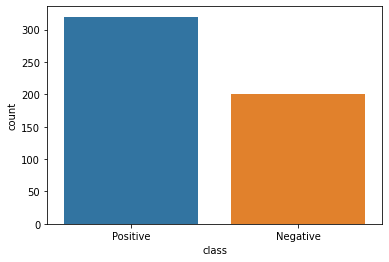

In [16]:
# countplot을 활용한 음성/양성 비율 시각화

sns.countplot(x='class',data=df)

C:\Users\pjwpy\.conda\envs\Park\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pjwpy\.conda\envs\Park\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

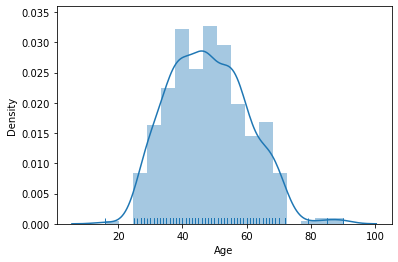

In [17]:
# distplot을 활용한 나이 분포도 시각화

sns.distplot(df["Age"], 
hist=True, 
kde=True, 
rug=True)

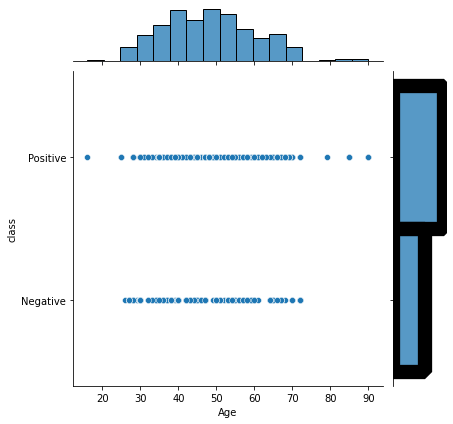

In [18]:
# jointplot를 활용한 나이 / 음성,양성 분포 시각화

sns.jointplot(x="Age", y="class", data=df)

<AxesSubplot:xlabel='Age', ylabel='class'>

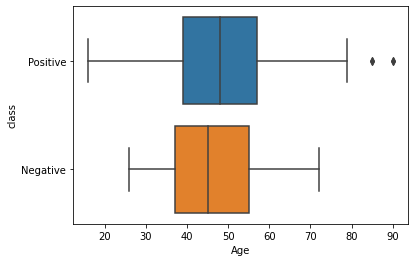

In [19]:
# boxplot을 활용한 나이 / 음성,양성 판정 분포 시각화

sns.boxplot(x="Age", y="class", 
data=df)

<Figure size 576x432 with 0 Axes>

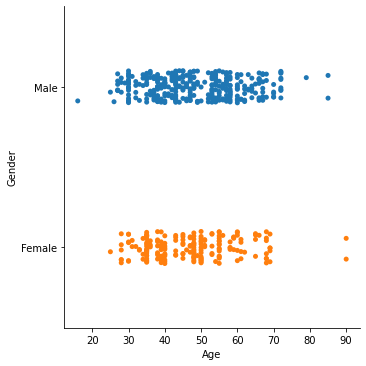

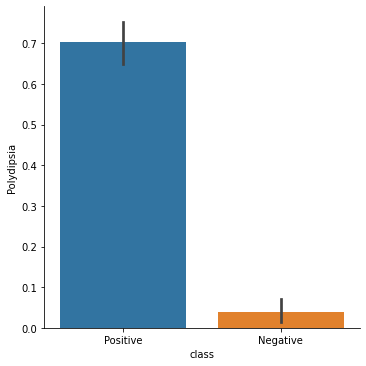

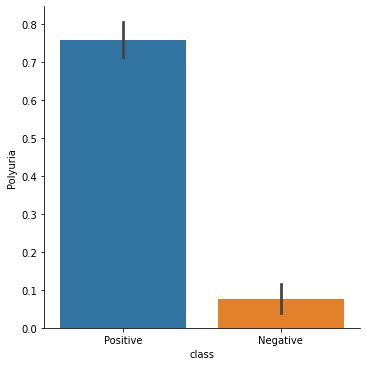

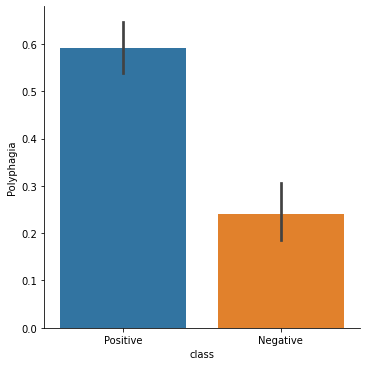

<Figure size 576x432 with 0 Axes>

In [20]:
# catplot을 활용한 분포 시각화

sns.catplot(x="Age",y="Gender", data=df)
sns.catplot(x="class",y="Polydipsia", 
kind="bar", data=df)
sns.catplot(x="class", y="Polyuria", 
kind="bar", data=df)
sns.catplot(x="class", y="Polyphagia", 
kind="bar", data=df)
plt.figure(figsize=(8,6))

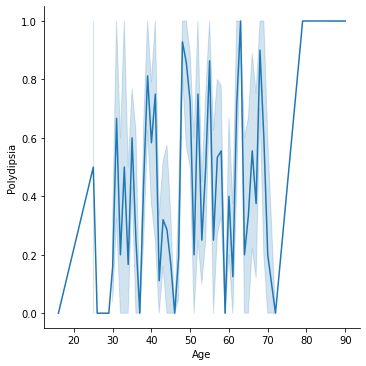

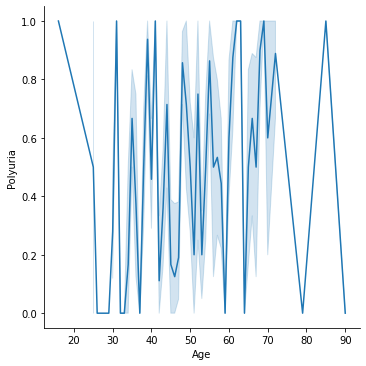

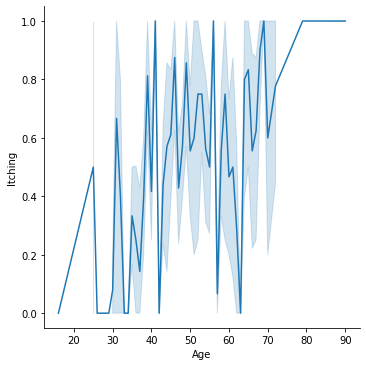

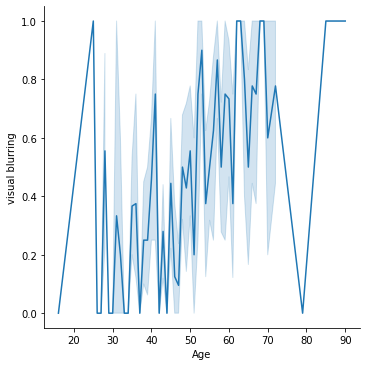

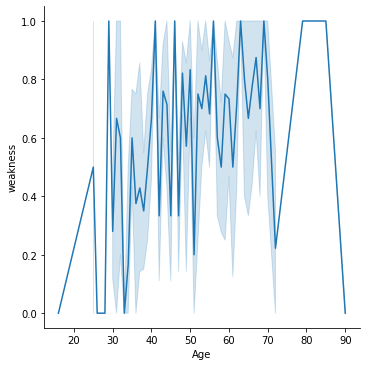

In [21]:
# relplot을 활용한 나이대비 질병 분포 시각화

sns.relplot(x="Age",y="Polydipsia",data=df, 
kind="line")
sns.relplot(x="Age",y="Polyuria",data=df,kind="line")
sns.relplot(x="Age",y="Itching",data=df,kind="line")
sns.relplot(x="Age",y="visual blurring",data=df,kind="line")
sns.relplot(x="Age",y="weakness",data=df,kind="line")

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


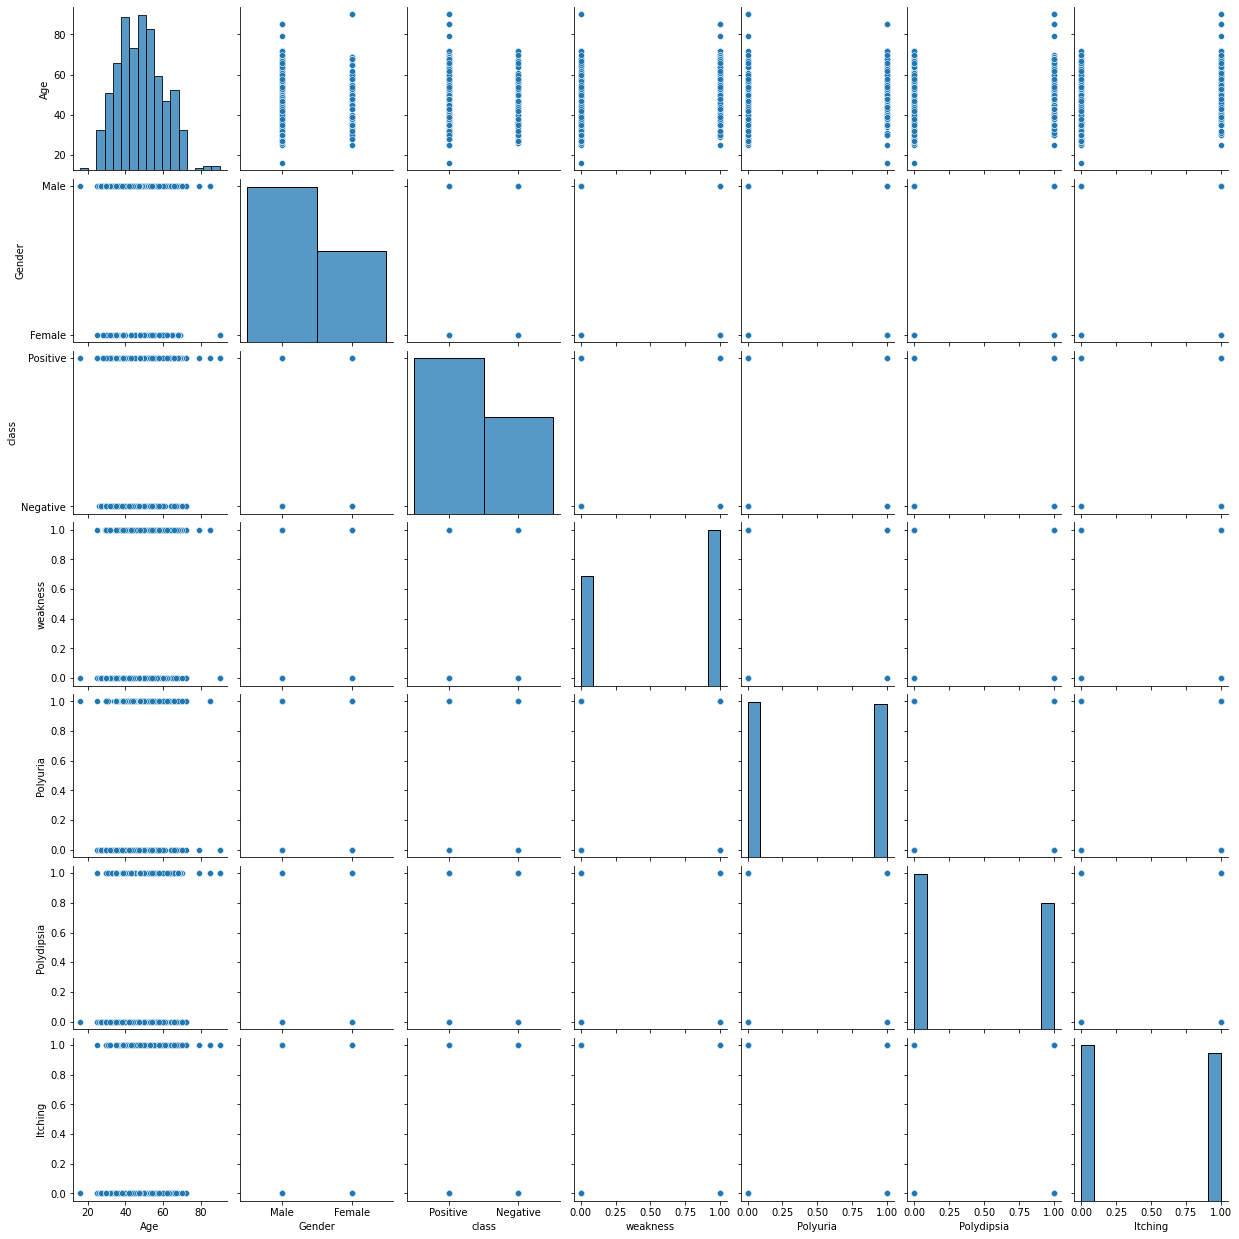

In [22]:
# 연관분석을 기반한 pairplot 분석 시각화

sns.pairplot(df, vars=["Age","Gender","class","weakness","Polyuria","Polydipsia","Itching"])
plt.show()